<a href="https://colab.research.google.com/github/phuongle05/NCKH-1-/blob/main/Ph%C3%A2n_t%C3%ADch_d%E1%BB%AF_li%E1%BB%87u_web.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Combine_data

In [41]:
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/cosmetic2912.csv'
cosmetic2912 =  pd.read_csv(file_path)

In [42]:
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/cosmetic31.csv'
cosmetic31 =  pd.read_csv(file_path)

In [43]:
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/cosmetic101.csv'
cosmetic101 =  pd.read_csv(file_path)


In [44]:
combined_cosmetic = pd.concat([cosmetic2912, cosmetic31, cosmetic101], ignore_index=True)


combined_cosmetic.to_csv('combined_cosmetics.csv', index=False)

In [45]:
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/food2912.csv'
food2912 =  pd.read_csv(file_path)


In [46]:
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/food31.csv'
food31 =  pd.read_csv(file_path)

In [47]:
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/food101.csv'
food101 =  pd.read_csv(file_path)

In [48]:
combined_food = pd.concat([food2912, food31, food101], ignore_index=True)


combined_food.to_csv('combined_foods.csv', index=False)

In [49]:
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/fashion31.csv'
fashion31 =  pd.read_csv(file_path)

In [50]:
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/fashion2912.csv'
fashion2912 =  pd.read_csv(file_path)
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/fashion101.csv'
fashion101 =  pd.read_csv(file_path)
combined_fashion = pd.concat([fashion2912, fashion31, fashion101], ignore_index=True)


combined_fashion.to_csv('combined_fashions.csv', index=False)

In [51]:
combined_data = pd.concat([combined_cosmetic, combined_food, combined_fashion], ignore_index=True)
combined_data.to_csv('combined_data.csv', index=False)

Tiền xử lý dữ liệu

In [52]:

print("Thông tin dữ liệu ban đầu:")
print(combined_data.info())

combined_data = combined_data.dropna()
combined_data.describe()


Thông tin dữ liệu ban đầu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890 entries, 0 to 4889
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4890 non-null   int64  
 1   name               4890 non-null   object 
 2   categories         4890 non-null   object 
 3   short_description  4890 non-null   object 
 4   quantity_sold      4726 non-null   float64
 5   list_price         4890 non-null   int64  
 6   price              4890 non-null   int64  
 7   discount           4890 non-null   int64  
 8   date_collection    4890 non-null   object 
 9   rating_average     4490 non-null   float64
 10  gift_item          4761 non-null   object 
 11  day_ago_created    3260 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 458.6+ KB
None


,id,quantity_sold,list_price,price,discount,rating_average,day_ago_created
count,2.726000e+03,2726.000000,2.726000e+03,2.726000e+03,2.726000e+03,2726.000000,2726.000000
mean,1.281558e+08,2019.708364,3.291399e+05,2.633536e+05,6.578628e+04,4.426266,1254.367205
std,8.882984e+07,7786.429939,4.897429e+05,3.827917e+05,1.871845e+05,1.197036,624.493939
min,4.377580e+05,1.000000,1.999000e+03,1.999000e+03,0.000000e+00,0.000000,0.000000
25%,5.535285e+07,53.000000,8.587400e+04,7.600000e+04,0.000000e+00,4.600000,899.000000
50%,1.115602e+08,277.000000,1.700000e+05,1.400000e+05,4.100000e+03,4.800000,1271.000000
75%,1.916733e+08,1184.750000,3.500000e+05,2.900000e+05,5.500000e+04,5.000000,1680.500000
max,2.766130e+08,105420.000000,4.350000e+06,3.550000e+06,2.000000e+06,5.000000,2875.000000


Xử lý dữ liệu sản phẩm

In [53]:
if 'categories' in combined_data.columns:

    def map_categories(category):
        if 'Thời trang' in category:
            return 'fashion'
        elif 'Làm đẹp - Sức khỏe' in category:
            return 'cosmetic'
        elif 'Thực phẩm - Đồ uống' in category:
            return 'food'
        else:
            return 'other'


    combined_data.loc[:, 'item_type'] = combined_data['categories'].apply(map_categories)


In [54]:
print(combined_data['item_type'].value_counts())


item_type
cosmetic    1067
fashion      851
food         808
Name: count, dtype: int64


Mã hóa gift_item

In [55]:
from sklearn.preprocessing import LabelEncoder

if 'gift_item' in combined_data.columns:

    combined_data.loc[:, 'gift_item'] = LabelEncoder().fit_transform(combined_data['gift_item'])


In [56]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

columns_to_check = ['quantity_sold', 'list_price', 'price', 'discount', 'rating_average']

existing_columns = [col for col in columns_to_check if col in combined_data.columns]

combined_data.dropna(axis=0, subset=existing_columns, inplace=True)


if 'list_price' in combined_data.columns and 'price' in combined_data.columns:
    combined_data['discount_ratio'] = (combined_data['list_price'] - combined_data['price']) / combined_data['list_price']
    combined_data['discount_ratio'] = combined_data['discount_ratio'].replace([np.inf, -np.inf], np.nan)

if 'quantity_sold' in combined_data.columns and 'price' in combined_data.columns:
    combined_data['price_per_unit'] = combined_data['price'] / combined_data['quantity_sold']


    combined_data.loc[combined_data['quantity_sold'] == 0, 'price_per_unit'] = np.nan
    combined_data['price_per_unit'] = combined_data['price_per_unit'].replace([np.inf, -np.inf], np.nan)


numerical_cols = ['list_price', 'price', 'quantity_sold', 'discount_ratio', 'rating_average', 'price_per_unit']
numerical_cols = [col for col in numerical_cols if col in combined_data.columns]


combined_data.dropna(axis=0, subset=numerical_cols, inplace=True) # Drop rows with NA in numerical cols


scaler = MinMaxScaler()
combined_data[numerical_cols] = scaler.fit_transform(combined_data[numerical_cols])

CHuyển đổi ngày tháng

In [57]:
import pandas as pd

if 'date_collection' in combined_data.columns:
    try:
        combined_data['date_collection'] = pd.to_datetime(combined_data['date_collection'], errors='raise')


        combined_data['day'] = combined_data['date_collection'].dt.day
        combined_data['month'] = combined_data['date_collection'].dt.month
        combined_data['year'] = combined_data['date_collection'].dt.year
        combined_data['day_of_week'] = combined_data['date_collection'].dt.dayofweek
        combined_data['season'] = combined_data['date_collection'].dt.month % 12 // 3 + 1


        combined_data.drop('date_collection', axis=1, inplace=True)
    except Exception as e:
        print(f"Error converting 'date_collection' to datetime: {e}")
else:
    print("Cột 'date_collection' không tồn tại trong DataFrame.")


In [58]:
print("\nThông tin dữ liệu sau tiền xử lý:")
print(combined_data.info())


Thông tin dữ liệu sau tiền xử lý:
<class 'pandas.core.frame.DataFrame'>
Index: 2726 entries, 550 to 4779
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2726 non-null   int64  
 1   name               2726 non-null   object 
 2   categories         2726 non-null   object 
 3   short_description  2726 non-null   object 
 4   quantity_sold      2726 non-null   float64
 5   list_price         2726 non-null   float64
 6   price              2726 non-null   float64
 7   discount           2726 non-null   int64  
 8   rating_average     2726 non-null   float64
 9   gift_item          2726 non-null   object 
 10  day_ago_created    2726 non-null   float64
 11  item_type          2726 non-null   object 
 12  discount_ratio     2726 non-null   float64
 13  price_per_unit     2726 non-null   float64
 14  day                2726 non-null   int32  
 15  month              2726 non-null   int32

Tiền xử lý dữ liệu Review

In [59]:
import pandas as pd
file_path = '/content/drive/MyDrive/Colab Notebooks/review.csv'
review =  pd.read_csv(file_path)
print(review.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042 entries, 0 to 2041
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   User Id        2042 non-null   object
 1   Anonymous      2042 non-null   object
 2   Comment Date   2042 non-null   object
 3   Comment        2042 non-null   object
 4   Rating         2042 non-null   int64 
 5   Product Id     2042 non-null   object
 6   Product Title  2042 non-null   object
 7   Scraped At     2042 non-null   object
 8   Category       2039 non-null   object
dtypes: int64(1), object(8)
memory usage: 143.7+ KB
None


In [60]:
review['Category'] = review['Category'].fillna('fashion')


In [61]:
from textblob import TextBlob

def analyze_sentiment(comment):
    analysis = TextBlob(comment)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'


review['Sentiment'] = review['Comment'].apply(analyze_sentiment)
output_path = '/content/drive/MyDrive/Colab Notebooks/review_with_sentiment.xlsx'
review.to_excel(output_path, index=False)
output_path = '/content/drive/MyDrive/Colab Notebooks/review_with_sentiment.csv'
review.to_csv(output_path, index=False)
output_path


'/content/drive/MyDrive/Colab Notebooks/review_with_sentiment.csv'

In [62]:
import pandas as pd
review_with_sentiment = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/review_with_sentiment.csv')
review_with_sentiment = pd.read_csv(file_path)
print(review_with_sentiment.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042 entries, 0 to 2041
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   User Id        2042 non-null   object
 1   Anonymous      2042 non-null   object
 2   Comment Date   2042 non-null   object
 3   Comment        2042 non-null   object
 4   Rating         2042 non-null   int64 
 5   Product Id     2042 non-null   object
 6   Product Title  2042 non-null   object
 7   Scraped At     2042 non-null   object
 8   Category       2039 non-null   object
dtypes: int64(1), object(8)
memory usage: 143.7+ KB
None


Độ dài nhận xét

In [ ]:
review['comment_length'] = review['Comment'].apply(len)  # Số ký tự
review['word_count'] = review['Comment'].apply(lambda x: len(str(x).split()))  # Số từ
print("Độ dài nhận xét (số ký tự):")
print(review[['Comment', 'comment_length']])
print("\nSố từ trong nhận xét:")
print(review[['Comment', 'word_count']])


Độ dài nhận xét (số ký tự):
                                                Comment  comment_length
0     Công dụng:giảm mụn, chống rụng tóc\nĐối tượng ...             290
1     Giao hàng cũng nhanh, hàng chất lương, mà uống...             298
2     Sản phẩm chất lượng\nGiao hàng nhanhhh\nUống m...             129
3     Công dụng:giảm mụn\nĐối tượng sử dụng:thiếu kẽ...             305
4     đã mua nhiều lần của shop, đơn nào cũng đóng g...             158
...                                                 ...             ...
2037                                      Vừa vặn:  ok               13
2038  Mềm mại và thoải mái khi đeo, Phong cách và đa...             106
2039  Rất đẹp ngạc nhiên luôn\nNhẹ ấm quá tốt so với...             286
2040  shop giao hàng đúng mẫu hàng quốc tế giàu rất ...             141
2041  mn nên mua nha ấm dã man lúc đầu tưởng rẻ mua ...             100

[2042 rows x 2 columns]

Số từ trong nhận xét:
                                                Comment  wor

 Sự thay đổi Rating theo thời gian

In [ ]:
if 'UserID' in review.columns and 'ProductID' in review.columns and 'Rating' in review.columns:
    review['date'] = pd.to_datetime(review['date'], errors='coerce')  # Chuyển đổi ngày tháng
    review.sort_values(by=['UserID', 'ProductID', 'date'], inplace=True)  # Sắp xếp theo người dùng và sản phẩm
    review['rating_diff'] = review.groupby(['UserID', 'ProductID'])['Rating'].diff()  # Tính sự thay đổi rating
    print("\nSự thay đổi Rating theo thời gian:")
    print(review[['UserID', 'ProductID', 'Rating', 'rating_diff']])


Xuất hiện của từ khóa

In [63]:
keywords = ['giá', 'chất lượng', 'mua', 'nên', 'thích']  # Danh sách từ khóa
for keyword in keywords:
    review[f'contains_{keyword}'] = review['Comment'].apply(lambda x: 1 if keyword in str(x).lower() else 0)

print("\nSự xuất hiện của từ khóa:")
for keyword in keywords:
    print(f"Từ khóa: {keyword}")
    print(review[['Comment', f'contains_{keyword}']])



Sự xuất hiện của từ khóa:
Từ khóa: giá
                                                Comment  contains_giá
0     Công dụng:giảm mụn, chống rụng tóc\nĐối tượng ...             0
1     Giao hàng cũng nhanh, hàng chất lương, mà uống...             0
2     Sản phẩm chất lượng\nGiao hàng nhanhhh\nUống m...             0
3     Công dụng:giảm mụn\nĐối tượng sử dụng:thiếu kẽ...             0
4     đã mua nhiều lần của shop, đơn nào cũng đóng g...             0
...                                                 ...           ...
2037                                      Vừa vặn:  ok              0
2038  Mềm mại và thoải mái khi đeo, Phong cách và đa...             0
2039  Rất đẹp ngạc nhiên luôn\nNhẹ ấm quá tốt so với...             0
2040  shop giao hàng đúng mẫu hàng quốc tế giàu rất ...             0
2041  mn nên mua nha ấm dã man lúc đầu tưởng rẻ mua ...             0

[2042 rows x 2 columns]
Từ khóa: chất lượng
                                                Comment  contains_chất lượn

**Tích hợp hai nguồn dữ liệu**

In [64]:

print("Giá trị duy nhất trong combined_data:")
print(combined_data['categories'].unique())

print("\nGiá trị duy nhất trong review_with_sentiment:")
print(review_with_sentiment['Category'].unique())


Giá trị duy nhất trong combined_data:
['Làm đẹp - Sức khỏe' 'Thực phẩm - Đồ uống' 'Thời trang']

Giá trị duy nhất trong review_with_sentiment:
['Cosmetic' 'Food' 'Fashion' nan]


In [65]:
category_mapping = {
    'Làm đẹp - Sức khỏe': 'cosmetic',
    'Thực phẩm - Đồ uống': 'food',
    'Thời trang': 'fashion'
}

combined_data['categories'] = combined_data['categories'].map(category_mapping).str.lower()
review_with_sentiment['categories'] = review_with_sentiment['Category'].str.strip().str.lower()

In [66]:

merged_data = pd.merge(combined_data, review_with_sentiment, on='categories', how='inner')


print("Số dòng trong dữ liệu sau khi gộp:", len(merged_data))
print(merged_data.head())

merged_data.to_csv('merged_data.csv', index=False)


Số dòng trong dữ liệu sau khi gộp: 1882017
          id                                               name categories  \
0  274948742  [MỚI] Kem tẩy lông Veet cho da nhạy cảm 50g, c...   cosmetic   
1  274948742  [MỚI] Kem tẩy lông Veet cho da nhạy cảm 50g, c...   cosmetic   
2  274948742  [MỚI] Kem tẩy lông Veet cho da nhạy cảm 50g, c...   cosmetic   
3  274948742  [MỚI] Kem tẩy lông Veet cho da nhạy cảm 50g, c...   cosmetic   
4  274948742  [MỚI] Kem tẩy lông Veet cho da nhạy cảm 50g, c...   cosmetic   

                                   short_description  quantity_sold  \
0  Giữ lại bao bì bên ngoài để xem toàn bộ lưu ý ...       0.000702   
1  Giữ lại bao bì bên ngoài để xem toàn bộ lưu ý ...       0.000702   
2  Giữ lại bao bì bên ngoài để xem toàn bộ lưu ý ...       0.000702   
3  Giữ lại bao bì bên ngoài để xem toàn bộ lưu ý ...       0.000702   
4  Giữ lại bao bì bên ngoài để xem toàn bộ lưu ý ...       0.000702   

   list_price     price  discount  rating_average gift_item  

In [67]:
print("\nDữ liệu thiếu trong merged_data:")
print(merged_data.isnull().sum())



Dữ liệu thiếu trong merged_data:
id                   0
name                 0
categories           0
short_description    0
quantity_sold        0
list_price           0
price                0
discount             0
rating_average       0
gift_item            0
day_ago_created      0
item_type            0
discount_ratio       0
price_per_unit       0
day                  0
month                0
year                 0
day_of_week          0
season               0
User Id              0
Anonymous            0
Comment Date         0
Comment              0
Rating               0
Product Id           0
Product Title        0
Scraped At           0
Category             0
dtype: int64


In [68]:
merged_data = merged_data.dropna(axis=1)
print("\nmerged_data sau khi loại bỏ các cột thiếu:")
print(merged_data.info())


merged_data sau khi loại bỏ các cột thiếu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882017 entries, 0 to 1882016
Data columns (total 28 columns):
 #   Column             Dtype  
---  ------             -----  
 0   id                 int64  
 1   name               object 
 2   categories         object 
 3   short_description  object 
 4   quantity_sold      float64
 5   list_price         float64
 6   price              float64
 7   discount           int64  
 8   rating_average     float64
 9   gift_item          object 
 10  day_ago_created    float64
 11  item_type          object 
 12  discount_ratio     float64
 13  price_per_unit     float64
 14  day                int32  
 15  month              int32  
 16  year               int32  
 17  day_of_week        int32  
 18  season             int32  
 19  User Id            object 
 20  Anonymous          object 
 21  Comment Date       object 
 22  Comment            object 
 23  Rating             int64  
 24  Produc

In [69]:
print(merged_data.info())
print(merged_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882017 entries, 0 to 1882016
Data columns (total 28 columns):
 #   Column             Dtype  
---  ------             -----  
 0   id                 int64  
 1   name               object 
 2   categories         object 
 3   short_description  object 
 4   quantity_sold      float64
 5   list_price         float64
 6   price              float64
 7   discount           int64  
 8   rating_average     float64
 9   gift_item          object 
 10  day_ago_created    float64
 11  item_type          object 
 12  discount_ratio     float64
 13  price_per_unit     float64
 14  day                int32  
 15  month              int32  
 16  year               int32  
 17  day_of_week        int32  
 18  season             int32  
 19  User Id            object 
 20  Anonymous          object 
 21  Comment Date       object 
 22  Comment            object 
 23  Rating             int64  
 24  Product Id         object 
 25  Product Title     

In [70]:
print(merged_data.isnull().sum())

id                   0
name                 0
categories           0
short_description    0
quantity_sold        0
list_price           0
price                0
discount             0
rating_average       0
gift_item            0
day_ago_created      0
item_type            0
discount_ratio       0
price_per_unit       0
day                  0
month                0
year                 0
day_of_week          0
season               0
User Id              0
Anonymous            0
Comment Date         0
Comment              0
Rating               0
Product Id           0
Product Title        0
Scraped At           0
Category             0
dtype: int64


In [82]:
import pandas as pd
from textblob import TextBlob

if 'Sentiment' not in merged_data.columns:
    def analyze_sentiment(comment):
        analysis = TextBlob(comment)
        if analysis.sentiment.polarity > 0:
            return 'Positive'
        elif analysis.sentiment.polarity < 0:
            return 'Negative'
        else:
            return 'Neutral'

    merged_data['Sentiment'] = merged_data['Comment'].apply(analyze_sentiment)
    print("Sentiment column created and added to merged_data.")
else:
    print("Sentiment column already exists in merged_data.")

Sentiment column created and added to merged_data.


Thống kê mô tả

In [71]:
print("\nThống kê mô tả của merged_data:")
print(merged_data.describe())



Thống kê mô tả của merged_data:
                 id  quantity_sold    list_price         price      discount  \
count  1.882017e+06   1.882017e+06  1.882017e+06  1.882017e+06  1.882017e+06   
mean   1.278662e+08   2.050723e-02  7.708945e-02  7.621476e-02  6.477496e+04   
std    8.918956e+07   7.849650e-02  1.145506e-01  1.118894e-01  1.824213e+05   
min    4.377580e+05   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    5.476160e+07   4.932697e-04  1.943445e-02  2.116713e-02  0.000000e+00   
50%    1.119727e+08   2.627610e-03  3.976563e-02  4.030467e-02  4.100000e+03   
75%    1.916808e+08   1.142109e-02  8.233692e-02  8.370939e-02  5.500000e+04   
max    2.766130e+08   1.000000e+00  1.000000e+00  1.000000e+00  2.000000e+06   

       rating_average  day_ago_created  discount_ratio  price_per_unit  \
count    1.882017e+06     1.882017e+06    1.882017e+06    1.882017e+06   
mean     8.855708e-01     1.260312e+03    2.013218e-01    1.319887e-02   
std      2.391357e-01   

**EDA**

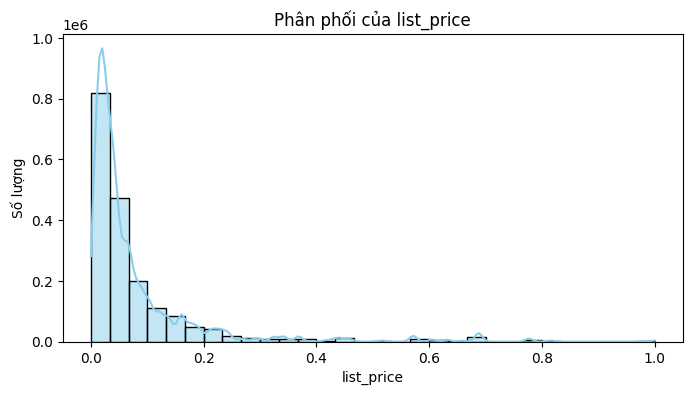

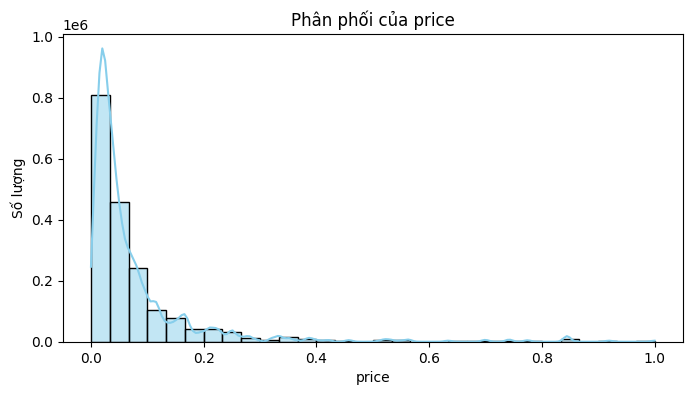

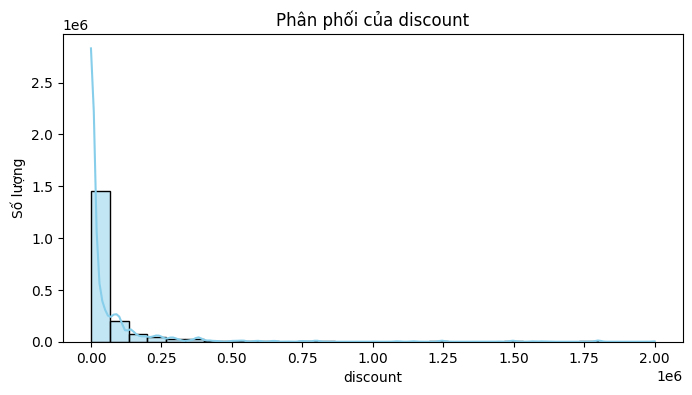

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram cho các biến giá
price_cols = ['list_price', 'price', 'discount']
for col in price_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(merged_data[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Phân phối của {col}")
    plt.xlabel(col)
    plt.ylabel("Số lượng")
    plt.show()

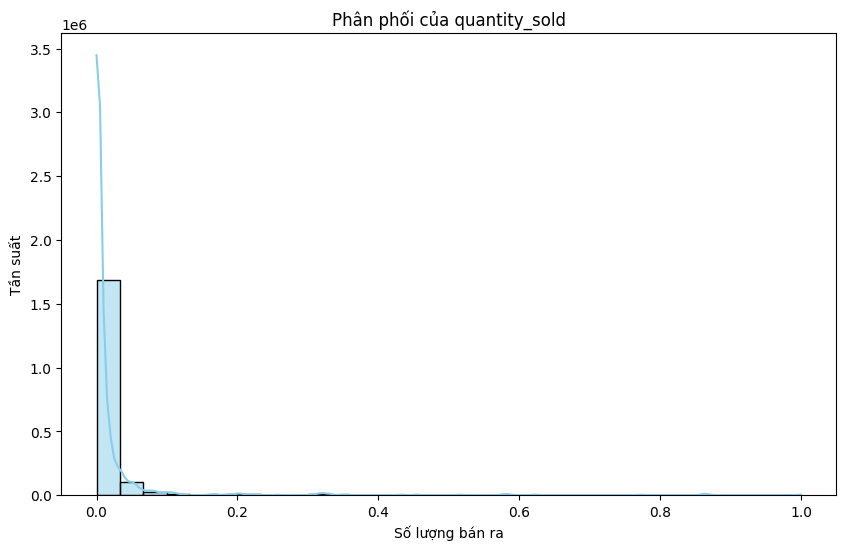

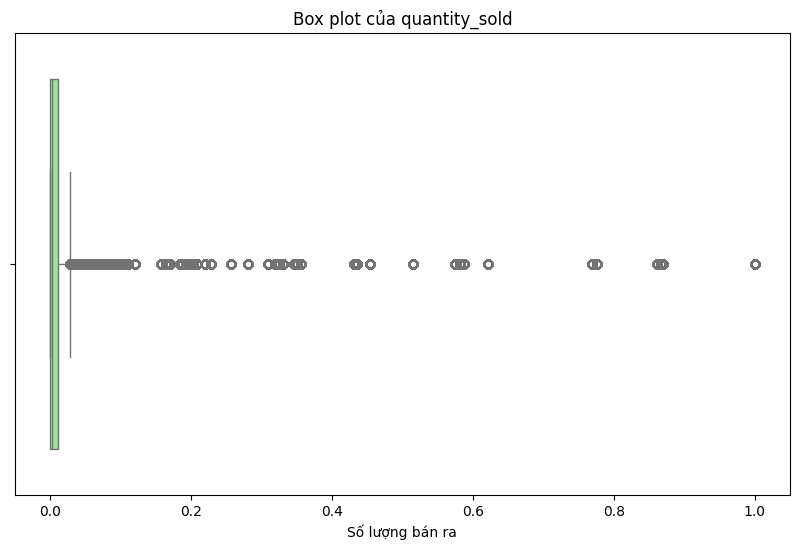

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Biểu đồ histogram cho quantity_sold
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['quantity_sold'], bins=30, kde=True, color='skyblue')
plt.title('Phân phối của quantity_sold')
plt.xlabel('Số lượng bán ra')
plt.ylabel('Tần suất')
plt.show()

# Box plot để kiểm tra các giá trị ngoại lệ
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_data['quantity_sold'], color='lightgreen')
plt.title('Box plot của quantity_sold')
plt.xlabel('Số lượng bán ra')
plt.show()

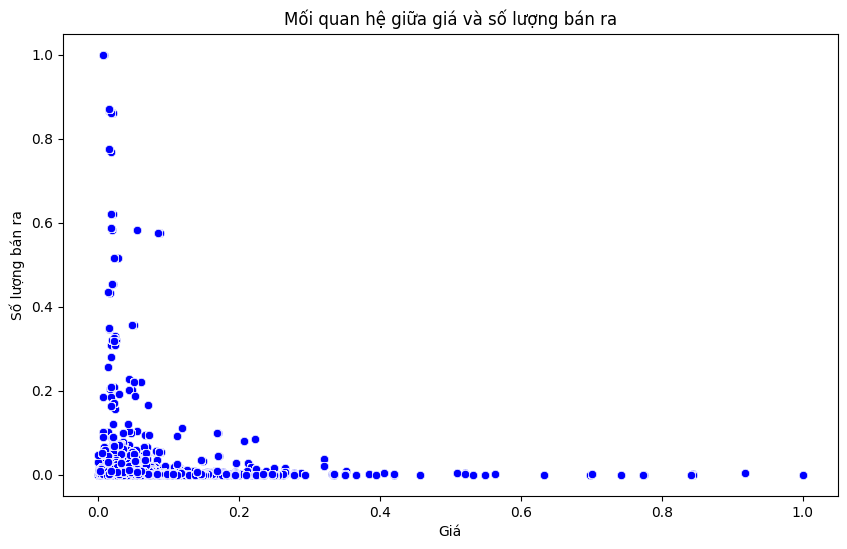

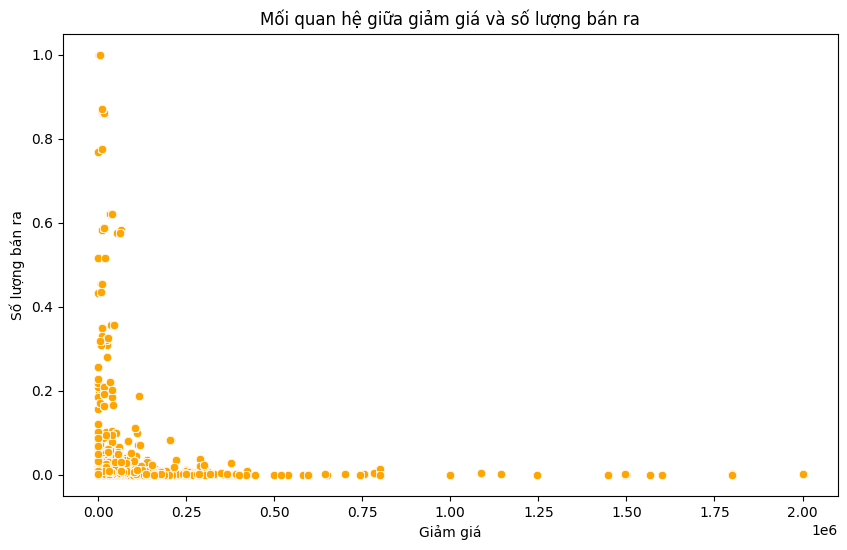

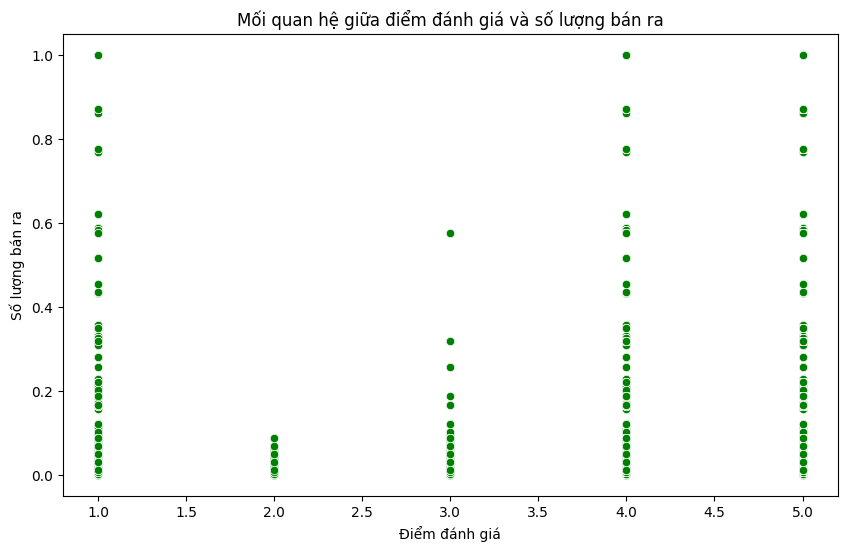

<ipython-input-83-4d371a329fc8>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_data, x='Sentiment', y='quantity_sold', palette='Set2')


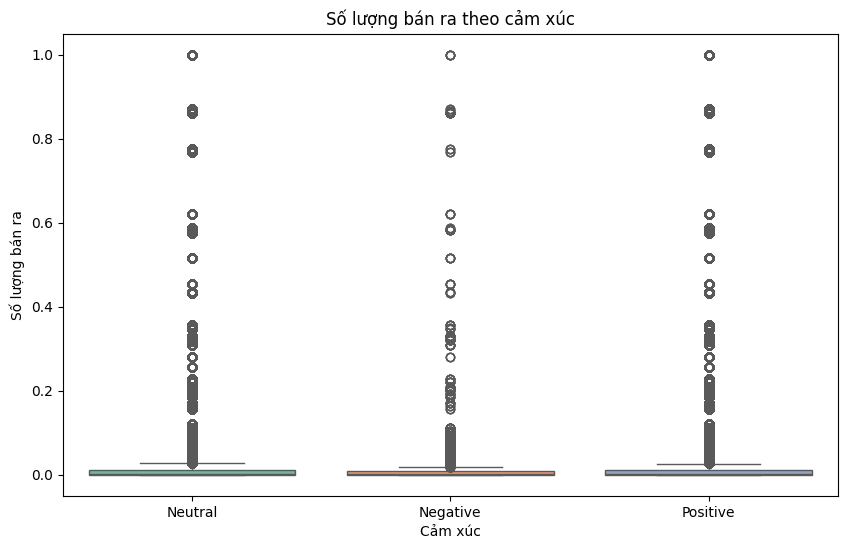

In [83]:
# Biểu đồ phân tán giữa quantity_sold và price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='price', y='quantity_sold', color='blue')
plt.title('Mối quan hệ giữa giá và số lượng bán ra')
plt.xlabel('Giá')
plt.ylabel('Số lượng bán ra')
plt.show()

# Biểu đồ phân tán giữa quantity_sold và discount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='discount', y='quantity_sold', color='orange')
plt.title('Mối quan hệ giữa giảm giá và số lượng bán ra')
plt.xlabel('Giảm giá')
plt.ylabel('Số lượng bán ra')
plt.show()

# Biểu đồ phân tán giữa quantity_sold và Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Rating', y='quantity_sold', color='green')
plt.title('Mối quan hệ giữa điểm đánh giá và số lượng bán ra')
plt.xlabel('Điểm đánh giá')
plt.ylabel('Số lượng bán ra')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='Sentiment', y='quantity_sold', palette='Set2')
plt.title('Số lượng bán ra theo cảm xúc')
plt.xlabel('Cảm xúc')
plt.ylabel('Số lượng bán ra')
plt.show()

In [84]:
date_columns = ['date_collection', 'Comment Date', 'Scraped At']
for col in date_columns:
    if col in merged_data.columns:
        merged_data[col] = pd.to_datetime(merged_data[col], format='%d/%m/%Y', errors='coerce')


In [85]:
# Hình dung sự thay đổi giá qua thời gian
if 'date_collection' in merged_data.columns:
    merged_data['year_month'] = merged_data['date_collection'].dt.to_period('M')

    avg_price_by_month = merged_data.groupby('year_month')['price'].mean().reset_index()

    # Convert 'year_month' to string before plotting
    avg_price_by_month['year_month'] = avg_price_by_month['year_month'].astype(str)

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=avg_price_by_month, x='year_month', y='price', marker='o', color='blue')
    plt.title("Thay đổi giá trung bình qua các tháng")
    plt.xlabel("Thời gian (Năm-Tháng)")
    plt.ylabel("Giá trung bình")
    plt.xticks(rotation=45)
    plt.show()

Phân tích cảm xúc

<ipython-input-86-74d37ece64ef>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


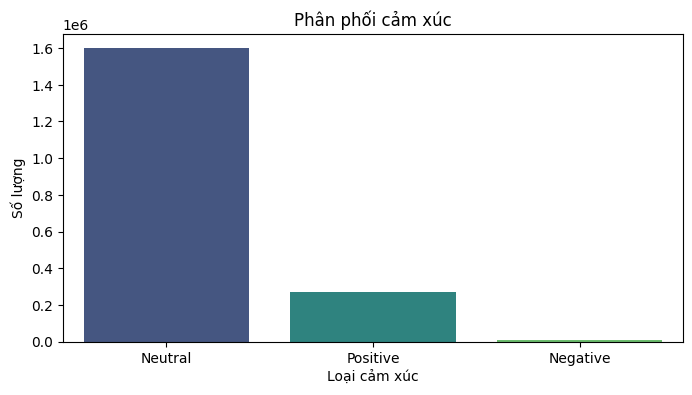

In [86]:
if 'Sentiment' in merged_data.columns:
    sentiment_counts = merged_data['Sentiment'].value_counts()

    plt.figure(figsize=(8, 4))
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
    plt.title("Phân phối cảm xúc")
    plt.xlabel("Loại cảm xúc")
    plt.ylabel("Số lượng")
    plt.show()


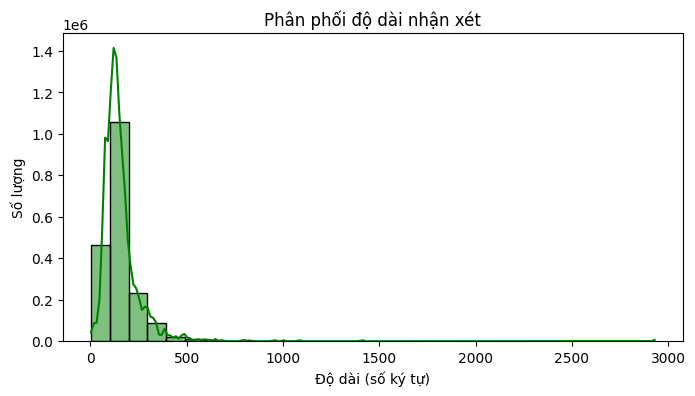

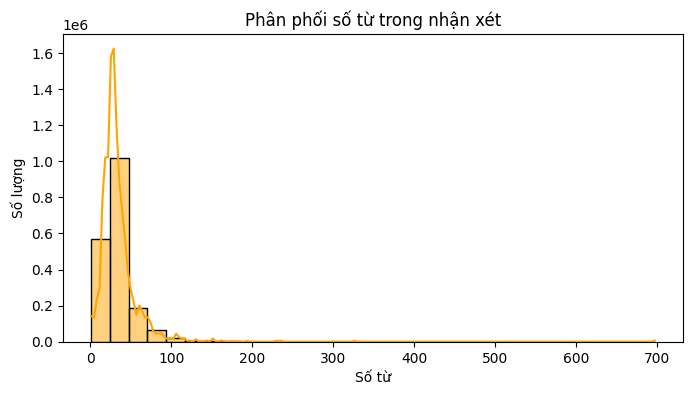

In [87]:

if 'Comment' in merged_data.columns:
    merged_data['comment_length'] = merged_data['Comment'].apply(len)
    merged_data['word_count'] = merged_data['Comment'].apply(lambda x: len(str(x).split()))

    # Phân phối độ dài nhận xét
    plt.figure(figsize=(8, 4))
    sns.histplot(merged_data['comment_length'], kde=True, bins=30, color='green')
    plt.title("Phân phối độ dài nhận xét")
    plt.xlabel("Độ dài (số ký tự)")
    plt.ylabel("Số lượng")
    plt.show()


    plt.figure(figsize=(8, 4))
    sns.histplot(merged_data['word_count'], kde=True, bins=30, color='orange')
    plt.title("Phân phối số từ trong nhận xét")
    plt.xlabel("Số từ")
    plt.ylabel("Số lượng")
    plt.show()


Chuyển đổi và chuẩn hóa dữ liệu

In [88]:
# Mã hóa các biến phân loại (Label Encoding)
categorical_cols = ['categories', 'User Id', 'Product Id']

for col in categorical_cols:
    if col in merged_data.columns:
        le = LabelEncoder()
        merged_data[col] = le.fit_transform(merged_data[col])
        print(f"Đã mã hóa cột {col} bằng Label Encoding.")


Đã mã hóa cột categories bằng Label Encoding.
Đã mã hóa cột User Id bằng Label Encoding.
Đã mã hóa cột Product Id bằng Label Encoding.


Vector hóa các cột văn bản

In [ ]:
# Vector hóa cột Comment bằng TF-IDF
if 'Comment' in merged_data.columns:
    tfidf = TfidfVectorizer(max_features=500)  # Lấy 500 từ đặc trưng phổ biến nhất
    comment_vectors = tfidf.fit_transform(merged_data['Comment'].fillna('')).toarray()

    # Chuyển các vector TF-IDF thành DataFrame và gắn vào merged_data
    tfidf_df = pd.DataFrame(comment_vectors, columns=[f"tfidf_{i}" for i in range(comment_vectors.shape[1])])
    merged_data = pd.concat([merged_data.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)

    print("Đã vector hóa cột 'Comment' bằng TF-IDF.")

# Mã hóa cảm xúc (Sentiment) nếu cần
if 'Sentiment' in merged_data.columns:
    sentiment_mapping = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
    merged_data['Sentiment'] = merged_data['Sentiment'].map(sentiment_mapping)
    print("Đã mã hóa cột 'Sentiment' thành giá trị số.")


Đã vector hóa cột 'Comment' bằng TF-IDF.


Chuẩn hóa các giá trị số

In [89]:
# Danh sách các cột số cần chuẩn hóa
numerical_cols = ['list_price', 'price', 'discount', 'Rating']

# Chuẩn hóa bằng MinMaxScaler
scaler = MinMaxScaler()
merged_data[numerical_cols] = scaler.fit_transform(merged_data[numerical_cols])

print("Đã chuẩn hóa các cột số.")


Đã chuẩn hóa các cột số.


Lựa chọn đặc trưng (Feature Engineering)

Đặc trưng mới

In [91]:
# Tạo đặc trưng tỷ lệ giảm giá
if 'list_price' in merged_data.columns and 'price' in merged_data.columns:
    merged_data['discount_ratio'] = (merged_data['list_price'] - merged_data['price']) / merged_data['list_price']
    merged_data['discount_ratio'] = merged_data['discount_ratio'].fillna(0)
    print("Đã thêm đặc trưng 'discount_ratio'.")

# Tạo đặc trưng số lượng đánh giá (nếu dữ liệu có số lượt đánh giá)
if 'Rating' in merged_data.columns:
    rating_counts = merged_data.groupby('Product Id')['Rating'].count().rename("rating_count")
    merged_data = merged_data.merge(rating_counts, on='Product Id', how='left')
    print("Đã thêm đặc trưng 'rating_count'.")
# Tạo đặc trưng tỷ lệ giảm giá
if 'list_price' in merged_data.columns and 'price' in merged_data.columns:
    merged_data['discount_ratio'] = (merged_data['list_price'] - merged_data['price']) / merged_data['list_price']
    merged_data['discount_ratio'] = merged_data['discount_ratio'].fillna(0)
    print("Đã thêm đặc trưng 'discount_ratio'.")

# Xu hướng tiêu dùng theo thời gian (ví dụ: tháng hoặc năm)
if 'date_collection' in merged_data.columns:
    merged_data['date_collection'] = pd.to_datetime(merged_data['date_collection'], errors='coerce')
    merged_data['year'] = merged_data['date_collection'].dt.year
    merged_data['month'] = merged_data['date_collection'].dt.month
    merged_data['day_of_week'] = merged_data['date_collection'].dt.dayofweek
    print("Đã thêm các đặc trưng thời gian (year, month, day_of_week).")
    merged_data['month'] = merged_data['date_collection'].dt.month
    merged_data['day_of_week'] = merged_data['date_collection'].dt.dayofweek
    print("Đã thêm các đặc trưng thời gian (year, month, day_of_week).")

Đã thêm đặc trưng 'discount_ratio'.
Đã thêm đặc trưng 'rating_count'.
Đã thêm đặc trưng 'discount_ratio'.


Phân loại người dùng

In [92]:
# Phân loại người dùng dựa trên số lượng sản phẩm đã mua
user_purchase_counts = merged_data.groupby('User Id')['Product Id'].count().rename("purchase_count")
merged_data = merged_data.merge(user_purchase_counts, on='User Id', how='left')

# Phân loại người dùng
def classify_user(purchase_count):
    if purchase_count > 50:
        return 'frequent_buyer'
    elif purchase_count > 10:
        return 'regular_buyer'
    else:
        return 'new_buyer'

merged_data['user_type'] = merged_data['purchase_count'].apply(classify_user)
print("Đã phân loại người dùng thành các nhóm: new_buyer, regular_buyer, frequent_buyer.")


Đã phân loại người dùng thành các nhóm: new_buyer, regular_buyer, frequent_buyer.


Phân loại sản phẩm

In [94]:
def classify_product(category):
    try:
        category = str(category)
        if 'cosmetic' in category:
            return 'beauty'
        elif 'food' in category:
            return 'grocery'
        elif 'fashion' in category:
            return 'clothing'
        else:
            return 'other'
    except Exception as e:
        print(f"Error classifying category: {category}, error: {e}")
        return 'other'

if 'categories' in merged_data.columns:
    merged_data['product_type'] = merged_data['categories'].apply(classify_product)
    print("Đã phân loại sản phẩm thành các nhóm: beauty, grocery, clothing, other.")

Đã phân loại sản phẩm thành các nhóm: beauty, grocery, clothing, other.


In [95]:
print("\nDữ liệu sau khi tạo các đặc trưng:")
print(merged_data.head())

print("\nThông tin dữ liệu:")
print(merged_data.info())


Dữ liệu sau khi tạo các đặc trưng:
          id                                               name  categories  \
0  274948742  [MỚI] Kem tẩy lông Veet cho da nhạy cảm 50g, c...           0   
1  274948742  [MỚI] Kem tẩy lông Veet cho da nhạy cảm 50g, c...           0   
2  274948742  [MỚI] Kem tẩy lông Veet cho da nhạy cảm 50g, c...           0   
3  274948742  [MỚI] Kem tẩy lông Veet cho da nhạy cảm 50g, c...           0   
4  274948742  [MỚI] Kem tẩy lông Veet cho da nhạy cảm 50g, c...           0   

                                   short_description  quantity_sold  \
0  Giữ lại bao bì bên ngoài để xem toàn bộ lưu ý ...       0.000702   
1  Giữ lại bao bì bên ngoài để xem toàn bộ lưu ý ...       0.000702   
2  Giữ lại bao bì bên ngoài để xem toàn bộ lưu ý ...       0.000702   
3  Giữ lại bao bì bên ngoài để xem toàn bộ lưu ý ...       0.000702   
4  Giữ lại bao bì bên ngoài để xem toàn bộ lưu ý ...       0.000702   

   list_price     price  discount  rating_average gift_item  .

Phân tích tương quan và lựa chọn biến

In [96]:
print("Các cột hiện có trong dữ liệu:")
print(merged_data.columns)


Các cột hiện có trong dữ liệu:
Index(['id', 'name', 'categories', 'short_description', 'quantity_sold',
       'list_price', 'price', 'discount', 'rating_average', 'gift_item',
       'day_ago_created', 'item_type', 'discount_ratio', 'price_per_unit',
       'day', 'month', 'year', 'day_of_week', 'season', 'User Id', 'Anonymous',
       'Comment Date', 'Comment', 'Rating', 'Product Id', 'Product Title',
       'Scraped At', 'Category', 'Sentiment', 'comment_length', 'word_count',
       'rating_count', 'purchase_count', 'user_type', 'product_type'],
      dtype='object')


In [97]:
if 'list_price' in merged_data.columns and 'price' in merged_data.columns:
    merged_data['discount_ratio'] = (merged_data['list_price'] - merged_data['price']) / merged_data['list_price']
    merged_data['discount_ratio'] = merged_data['discount_ratio'].fillna(0)
    print("Đã tạo cột 'discount_ratio'.")
else:
    print("Cần kiểm tra sự tồn tại của cột 'list_price' và 'price'.")


Đã tạo cột 'discount_ratio'.


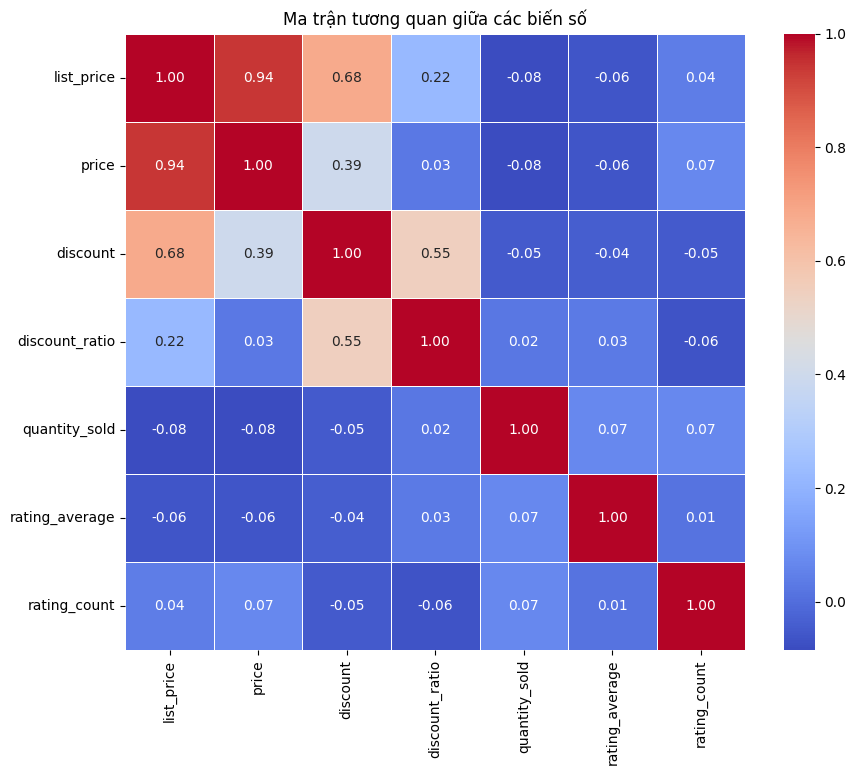

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


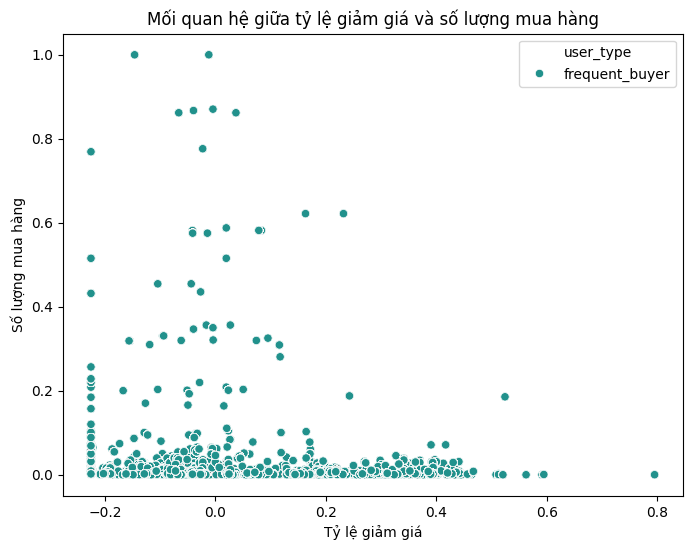

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# **1. Tính toán ma trận tương quan**
numerical_cols = ['list_price', 'price', 'discount', 'discount_ratio',
                  'quantity_sold', 'rating_average', 'rating_count']

# Lọc các cột số thực sự tồn tại
numerical_cols = [col for col in numerical_cols if col in merged_data.columns]

# Tính ma trận tương quan
correlation_matrix = merged_data[numerical_cols].corr()

# **2. Hình dung ma trận tương quan**
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Ma trận tương quan giữa các biến số")
plt.show()

# **3. Phân tích mối quan hệ giữa các đặc trưng và biến mục tiêu**

# Tạo đồ thị phân tán giữa 'discount_ratio' và 'quantity_sold'
if 'discount_ratio' in merged_data.columns and 'quantity_sold' in merged_data.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=merged_data, x='discount_ratio', y='quantity_sold', hue='user_type', palette='viridis')
    plt.title("Mối quan hệ giữa tỷ lệ giảm giá và số lượng mua hàng")
    plt.xlabel("Tỷ lệ giảm giá")
    plt.ylabel("Số lượng mua hàng")
    plt.show()
else:
    print("Cột 'discount_ratio' hoặc 'quantity_sold' không tồn tại trong dữ liệu.")

# Tạo đồ thị phân tán giữa 'rating_average' và 'quantity_sold'
if 'rating_average' in merged_data.columns and 'quantity_sold' in merged_data.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=merged_data, x='rating_average', y='quantity_sold', hue='user_type', palette='Set1')
    plt.title("Mối quan hệ giữa điểm đánh giá và số lượng mua hàng")
    plt.xlabel("Điểm đánh giá")
    plt.ylabel("Số lượng mua hàng")
    plt.show()
else:
    print("Cột 'rating_average' hoặc 'quantity_sold' không tồn tại trong dữ liệu.")

# **4. Phân tích các yếu tố ảnh hưởng đến tiêu dùng bền vững**
# Tạo đồ thị phân tán giữa 'discount_ratio' và 'rating_average'
if 'discount_ratio' in merged_data.columns and 'rating_average' in merged_data.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=merged_data, x='discount_ratio', y='rating_average', hue='user_type', palette='Set2')
    plt.title("Mối quan hệ giữa tỷ lệ giảm giá và điểm đánh giá")
    plt.xlabel("Tỷ lệ giảm giá")
    plt.ylabel("Điểm đánh giá")
    plt.show()
else:
    print("Cột 'discount_ratio' hoặc 'rating_average' không tồn tại trong dữ liệu.")

Dự đoán hành vi người tiêu dùng

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
if 'rating_count' not in merged_data.columns:
    if 'Rating' in merged_data.columns and 'Product Id' in merged_data.columns:
        rating_counts = merged_data.groupby('Product Id')['Rating'].count().rename("rating_count")
        merged_data = merged_data.merge(rating_counts, on='Product Id', how='left')
        print("Đã thêm đặc trưng 'rating_count'.")
    else:
        print("Cột 'Rating' hoặc 'Product Id' không tồn tại, không thể tạo 'rating_count'.")

X = merged_data[['list_price', 'discount_ratio', 'rating_average', 'rating_count']]
y = merged_data['quantity_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Hồi quy Tuyến tính**
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
h
print("Hồi quy Tuyến tính:")
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = mse_linear**0.5
print("RMSE:", rmse_linear)
print("R^2:", r2_score(y_test, y_pred_linear))

# **Random Forest**
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest:")
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf**0.5
print("RMSE:", rmse_rf)
print("R^2:", r2_score(y_test, y_pred_rf))

Hồi quy Tuyến tính:
RMSE: 0.07624773287154554
R^2: 0.01299862793667339

Random Forest:
RMSE: 0.03602590253967107
R^2: 0.7796598575128195


Phân tích cảm xúc - DL

In [ ]:
import pandas as pd


print(merged_data.head())

print(merged_data.columns)

          id                                               name  categories  \
0  274948742  [MỚI] Kem tẩy lông Veet cho da nhạy cảm 50g, c...         NaN   
1  274948742  [MỚI] Kem tẩy lông Veet cho da nhạy cảm 50g, c...         NaN   
2  274948742  [MỚI] Kem tẩy lông Veet cho da nhạy cảm 50g, c...         NaN   
3  273455567  Lăn Ngăn Mùi NIVEA MEN Black&White Ngăn Vệt Ố ...         NaN   
4  273455567  Lăn Ngăn Mùi NIVEA MEN Black&White Ngăn Vệt Ố ...         NaN   

                                   short_description  quantity_sold  \
0  Giữ lại bao bì bên ngoài để xem toàn bộ lưu ý ...       0.000702   
1  Giữ lại bao bì bên ngoài để xem toàn bộ lưu ý ...       0.000702   
2  Giữ lại bao bì bên ngoài để xem toàn bộ lưu ý ...       0.000702   
3  Lăn ngăn mùi NIVEA MEN ngăn ố vàng vượt trội (...       0.330671   
4  Lăn ngăn mùi NIVEA MEN ngăn ố vàng vượt trội (...       0.330671   

   list_price     price  discount date_collection  rating_average  ...  \
0    0.018629  0.021674 

Phân nhóm người tiêu dùng

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7fd06ff8f760>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


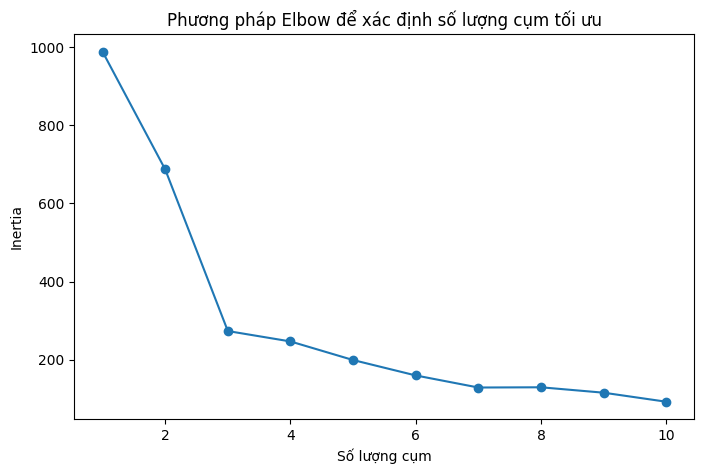

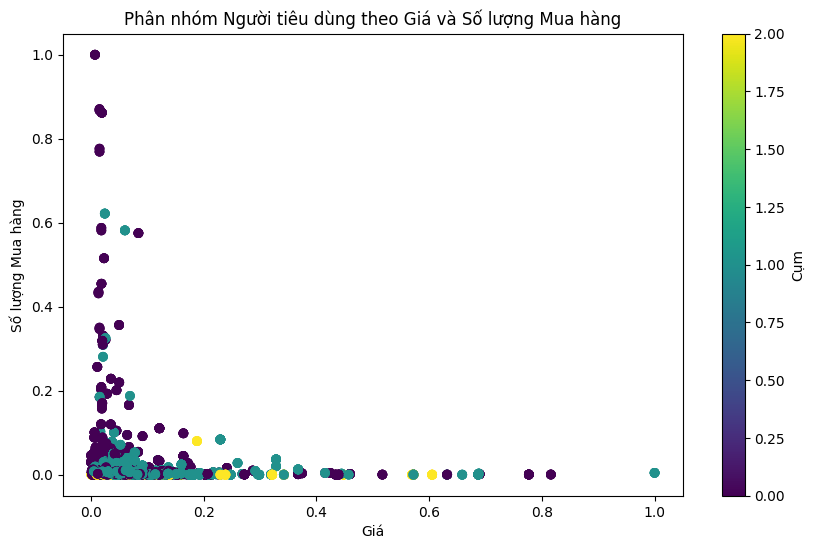

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_cluster = merged_data[['list_price', 'discount_ratio', 'rating_average', 'quantity_sold']]

inertia = []
for i in range(1 , 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Phương pháp Elbow để xác định số lượng cụm tối ưu')
plt.xlabel('Số lượng cụm')
plt.ylabel('Inertia')
plt.show()

optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
merged_data['Cluster'] = kmeans.fit_predict(X_cluster)

# Hình dung các cụm
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['list_price'], merged_data['quantity_sold'], c=merged_data['Cluster'], cmap='viridis')
plt.title('Phân nhóm Người tiêu dùng theo Giá và Số lượng Mua hàng')
plt.xlabel('Giá')
plt.ylabel('Số lượng Mua hàng')
plt.colorbar(label='Cụm')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

merged_data = pd.read_csv('merged_data.csv')

if 'rating_count' not in merged_data.columns:
    if 'Rating' in merged_data.columns and 'Product Id' in merged_data.columns:
        rating_counts = merged_data.groupby('Product Id')['Rating'].count().rename("rating_count")
        merged_data = merged_data.merge(rating_counts, on='Product Id', how='left')
        print("Đã thêm đặc trưng 'rating_count'.")
    else:
        print("Cột 'Rating' hoặc 'Product Id' không tồn tại, không thể tạo 'rating_count'.")

# Now you can select your features
X = merged_data[['list_price', 'discount_ratio', 'rating_average', 'rating_count']]
y = merged_data['quantity_sold']

# Continue with your model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Regression
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

print("\nSupport Vector Regression:")
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = mse_svr**0.5
print("RMSE:", rmse_svr)
print("R^2:", r2_score(y_test, y_pred_svr))

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("\nGradient Boosting Regressor:")
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mse_gb**0.5
print("RMSE:", rmse_gb)
print("R^2:", r2_score(y_test, y_pred_gb))

Đã thêm đặc trưng 'rating_count'.

Support Vector Regression:
RMSE: 0.11168160638650411
R^2: -1.117518388667179

Gradient Boosting Regressor:
RMSE: 0.0516800959011395
R^2: 0.5465697312039142


Turning siêu tham số cho RF

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated RMSE:", (-cv_scores)**0.5)

Cross-validated RMSE: [0.08322253 0.08822193 0.07550825 0.04677947 0.03547838]


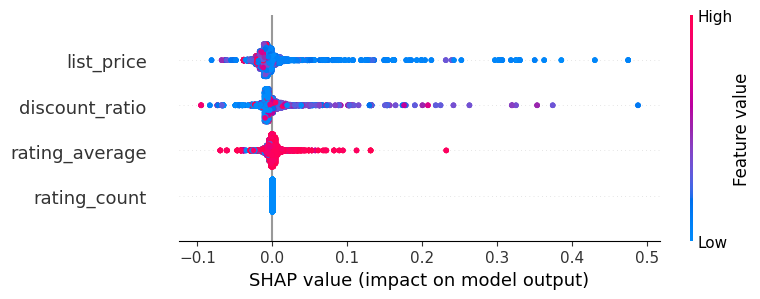

In [ ]:
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X)

shap.summary_plot(shap_values, X)

In [39]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

new_data = pd.DataFrame({
    'list_price': [100, 150],
    'discount_ratio': [0.1, 0.2],
    'rating_average': [4.5, 4.0],
    'rating_count': [100, 50]
})

# Define or re-instantiate the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # Define the model here

# Fit the model if necessary (if it hasn't been fitted already)
# You may need to load your training data (X_train, y_train) if not available
rf_model.fit(X_train, y_train) # This line was previously commented out

predictions = rf_model.predict(new_data)
print("Dự đoán số lượng mua hàng:", predictions)

NameError: name 'X_train' is not defined